# Prepping Reptilia Data for Inputting into R Script 

In [103]:
import pandas as pd

In [104]:
rep = pd.read_excel('../../BDNN_Arielli/data/reptilia_occ_genus.xlsm', engine='openpyxl')

In [105]:
# Cursory glance
rep.head()

,id,Rotated Lat,Rotated Lon,occurrence_no,pres_mode,preservation_quality,common_body_parts,abund_value,abund_unit,class,...,artifacts,component_comments,spatial_resolution,temporal_resolution,lagerstatten,concentration,orientation,abund_in_sediment,collection_comments,taxonomy_comments
0,4411,6.7390,-20.6269,146084,body,good,NaN,1.0,individuals,Reptilia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,common,NaN,NaN
1,4410,6.7390,-20.6269,146085,body,good,NaN,1.0,specimens,Reptilia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,common,NaN,NaN
2,4409,35.9688,2.1884,146086,body,NaN,NaN,NaN,NaN,Reptilia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4408,35.9688,2.1884,146087,body,NaN,NaN,3.0,specimens,Reptilia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4407,-62.6208,-11.8191,147521,body,NaN,NaN,10.0,specimens,Reptilia,...,NaN,NaN,NaN,snapshot,NaN,NaN,NaN,NaN,NaN,Carroll & Lindsay (1985) list two non-type spe...


In [106]:
rep.columns

Index(['id', 'Rotated Lat', 'Rotated Lon', 'occurrence_no', 'pres_mode',
       'preservation_quality', 'common_body_parts', 'abund_value',
       'abund_unit', 'class', 'family', 'genus', 'taxon_environment',
       'life_habit', 'diet', 'early_interval', 'late_interval', 'time_bins',
       'museum', 'collection_no', 'age_max', 'age_min', 'age_median',
       'age_uncer_range', 'lng', 'lat', 'environment', 'occurrence_comments',
       'cc', 'state', 'county', 'formation', 'stratgroup', 'member', 'zone',
       'accepted_rank', 'ref_author', 'ref_pubyr', 'reference_no.x',
       'collection_name', 'collection_subset', 'collection_aka',
       'latlng_basis', 'latlng_precision', 'geogscale', 'geogcomments',
       'paleomodel', 'geoplate', 'paleoage', 'paleolng', 'paleolat',
       'paleomodel2', 'geoplate2', 'paleoage2', 'paleolng2', 'paleolat2',
       'paleomodel3', 'geoplate3', 'paleoage3', 'paleolng3', 'paleolat3',
       'protected', 'stratscale', 'localsection', 'localbed', 'st

### Choosing an "Area" Column

'collection_no" will definitely be "Locality" column in the final table

'genus' will definitely be "Taxon" column in the final table

**Now I need to choose a 'Area' column**


In [107]:
# Looking for Nulls in the potential "Area" columns
nulls_zone = rep[rep['zone'].isnull()]
nulls_cc = rep[rep['cc'].isnull()]
len(nulls_zone), len(nulls_cc)


(3545, 8)

In [108]:
# Seeing how many unique values are in the potential "Area" columns
len(rep['zone'].unique()), len(rep['cc'].unique())


(107, 52)

'zone' column has more nulls and more unique values, so I'm going to go for the 'cc' column as the 'Area' column in the final dataset

In [109]:
# Filtering to just the columns deepdive needs
rep_filtered = rep[['genus', 'collection_no', 'age_max', 'age_min', 'cc']]
rep_filtered = rep_filtered.rename(columns={'genus': 'Taxon', 'collection_no': 'Locality', 'cc': 'Area', 'age_max':'MaxAge', 'age_min':'MinAge'})
rep_filtered.head()

,Taxon,Locality,MaxAge,MinAge,Area
0,Icarosaurus,12856,227.000,208.5,US
1,Rutiodon,12856,227.000,208.5,US
2,Kuehneosuchus,12857,208.500,201.4,UK
3,Kuehneosaurus,12858,208.500,201.4,UK
4,Procolophon,13043,251.902,247.2,ZA


### Imputing any Nulls


In [110]:
# Only 'Area' has nulls
rep_filtered.isna().sum()

Taxon       0
Locality    0
MaxAge      0
MinAge      0
Area        8
dtype: int64

In [111]:
# Looking at those nulls
rep_filtered[rep_filtered['Area'].isna()]

,Taxon,Locality,MaxAge,MinAge,Area
148,Mesosaurus,28468,290.1,283.5,NaN
149,Mesosaurus,28469,290.1,283.5,NaN
150,Mesosaurus,28470,290.1,283.5,NaN
151,Mesosaurus,28471,290.1,283.5,NaN
689,Plateosaurus,64316,208.5,201.4,NaN
1646,Mesosaurus,90755,290.1,283.5,NaN
1647,Mesosaurus,90755,290.1,283.5,NaN
1648,Mesosaurus,90780,290.1,283.5,NaN


In [112]:
# Seeing if the locality with nulls in 'Area' has any other entries. 
# If it does, we can infer the 'Area' with info from the other entries
null1 = rep[rep['collection_no'] == 90780]
null2 = rep[rep['collection_no'] == 90755]
null3 = rep[rep['collection_no'] == 64316]
null4 = rep[rep['collection_no'] == 28471]
null5 = rep[rep['collection_no'] == 28470]
null6 = rep[rep['collection_no'] == 28469]
null7 = rep[rep['collection_no'] == 28468]

In [113]:
# Seeing length of null entries for those localities
len(null1), len(null2), len(null3), len(null4), len(null5), len(null6), len(null7)
# Only null2 has >1

(1, 2, 1, 1, 1, 1, 1)

In [114]:
null2[['cc', 'state', 'county', 'formation', 'stratgroup', 'member', 'zone', 'collection_no']]


,cc,state,county,formation,stratgroup,member,zone,collection_no
1646,NaN,Karas,NaN,Whitehill,Ecca,NaN,NaN,90755
1647,NaN,Karas,NaN,Whitehill,Ecca,NaN,NaN,90755


In [115]:
rep[rep['cc'] == 'Karas']

,id,Rotated Lat,Rotated Lon,occurrence_no,pres_mode,preservation_quality,common_body_parts,abund_value,abund_unit,class,...,artifacts,component_comments,spatial_resolution,temporal_resolution,lagerstatten,concentration,orientation,abund_in_sediment,collection_comments,taxonomy_comments


In [116]:
# There are no reasonable values for these nulls to be imputed with, so I'll just drop them
# Checking original length of filtered df
rep_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Taxon     4411 non-null   object 
 1   Locality  4411 non-null   object 
 2   MaxAge    4411 non-null   float64
 3   MinAge    4411 non-null   float64
 4   Area      4403 non-null   object 
dtypes: float64(2), object(3)
memory usage: 172.4+ KB


In [117]:
# Dropping nulls, new df's length is correct
rep_filtered_dropped = rep_filtered.dropna()
rep_filtered_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4403 entries, 0 to 4410
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Taxon     4403 non-null   object 
 1   Locality  4403 non-null   object 
 2   MaxAge    4403 non-null   float64
 3   MinAge    4403 non-null   float64
 4   Area      4403 non-null   object 
dtypes: float64(2), object(3)
memory usage: 206.4+ KB


In [118]:
# Checking unique values for each column
len(rep_filtered_dropped['Taxon'].unique()), len(rep_filtered_dropped['Area'].unique()), len(rep_filtered_dropped['Locality'].unique())

(700, 51, 1726)

<Axes: xlabel='Area'>

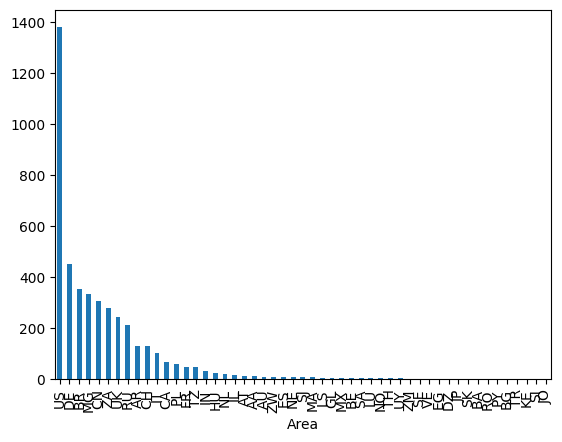

In [119]:
# Creating visual representation of value counts
# rep_filtered_dropped['Taxon'].value_counts().plot(kind='bar'), can't be done bc there are so many unique values
rep_filtered_dropped['Area'].value_counts().plot(kind='bar')
# rep_filtered_dropped['Locality'].value_counts().plot(kind='bar'), can't be done bc there are so many unique values

### 'Locality' EDA

In [120]:
# Finding all collection sites with only one instance (singletons)
singletons = rep_filtered_dropped['Locality'].value_counts()
singletons = singletons[singletons == 1]
len(singletons)

# This means 1092 of 1726 localities are singletons, or 63.3%

1092

In [121]:
rep_filtered_dropped.isna().sum()

Taxon       0
Locality    0
MaxAge      0
MinAge      0
Area        0
dtype: int64

In [122]:
# Saving it off for now
rep_filtered_dropped.to_csv('reptilia_deepdive_input.csv', index=False)